In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from multi_mems import *

## Data import

In [11]:
# This CSV file is separated by the 'delimiter ;'
df1 = pd.read_csv('extrait_wSleepPage01.csv', delimiter = ";")
df2 = pd.read_csv('spindles.csv', delimiter = ";")

In [12]:
#create a new column to match the time feature
dt = 0.005
t = np.arange(0,len(df1['SS'])*dt,dt)
df1['Time (s)'] = t

In [13]:
# The useful features of df1 contain "EOG Left", "EEG C3-A1", "EEG O1-A1", "EEG C4-A1", "EEG O2-A1"
df1_new = df1[['Time (s)',"EOG Left", "EEG C3-A1", "EEG O1-A1", "EEG C4-A1", "EEG O2-A1"]]
df1_new

,Time (s),EOG Left,EEG C3-A1,EEG O1-A1,EEG C4-A1,EEG O2-A1
0,0.000,"0,78125","5,56640625","-12,40234375","0,9765625","13,76953125"
1,0.005,"1,953125","4,78515625","-11,23046875","-0,09765625","17,08984375"
2,0.010,"-1,67E-14","4,296875","-11,23046875","0,9765625","17,96875"
3,0.015,"0,78125","4,78515625","-12,01171875","6,34765625","20,1171875"
4,0.020,"0,29296875","4,1015625","-13,18359375","8,10546875","17,3828125"
...,...,...,...,...,...,...
248435,1242.175,"-22,4609375","-21,38671875","21,77734375","-21,484375","21,6796875"
248436,1242.180,"-20,703125","-21,97265625","18,26171875","-19,43359375","19,921875"
248437,1242.185,"-20,5078125","-21,09375","14,6484375","-17,7734375","18,9453125"
248438,1242.190,"-18,06640625","-14,94140625","12,109375","-9,765625","17,48046875"


In [15]:
features = ["EOG Left", "EEG C3-A1", "EEG O1-A1", "EEG C4-A1", "EEG O2-A1"]
for x in features:
    df1_new[x] = [x.replace(',', '.') for x in df1_new[x]]

    
df1_new = df1_new.astype('float')

/tmp/ipykernel_2124283/1120865900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_new[x] = [x.replace(',', '.') for x in df1_new[x]]


In [38]:
# Prepare XVAFrames
xvaf1=xvframe(df1_new['EEG C3-A1'],np.gradient(df1_new['EEG C3-A1'],dt),t,fix_time=True)
xvaf2=xvframe(df1_new['EEG C4-A1'],np.gradient(df1_new['EEG C4-A1'],dt),t,fix_time=True)

#create concatenated dataframe
xvaf = xvaf1.join(xvaf2, how='outer', lsuffix='_1', rsuffix='_2')
xvaf.head()

#rename individual dataframes
xvaf1.columns = ['t_1', 'x_1', 'v_1']
xvaf2.columns = ['t_2', 'x_2', 'v_2']



### Plot Trajectories

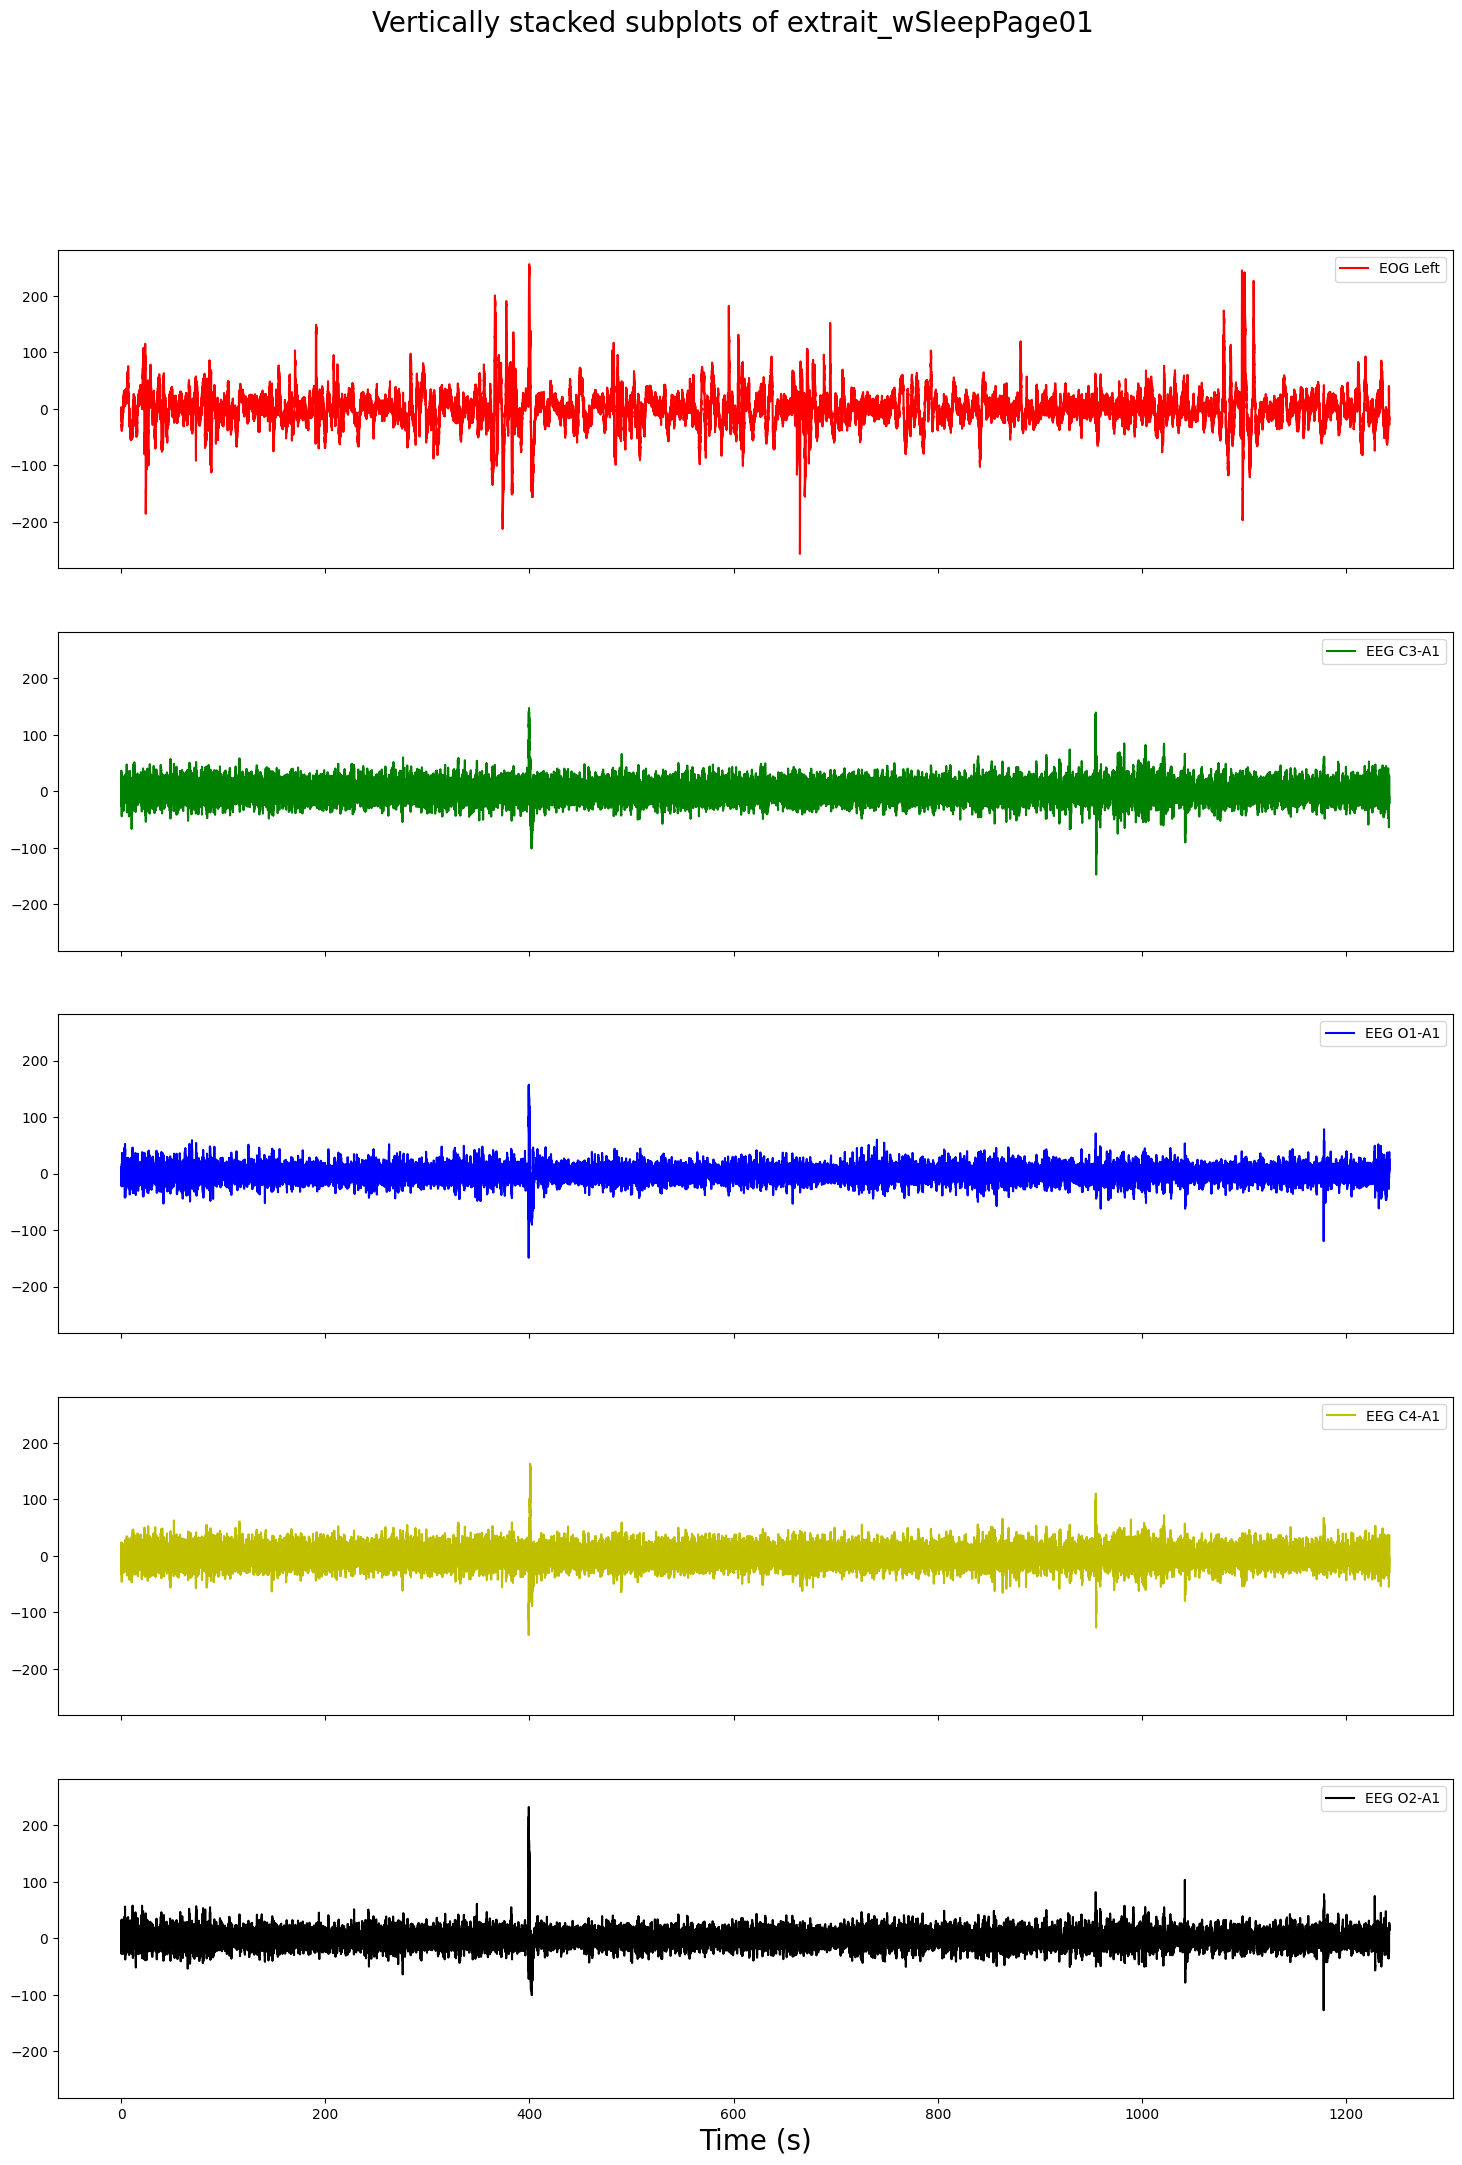

In [45]:
# plot these features in the same graph with stack plot
fig, axs = plt.subplots(5, sharex=True, sharey=True)
fig.set_size_inches(18, 24)
labels = ["EOG Left", "EEG C3-A1", "EEG O1-A1", 'EEG C4-A1', 'EEG O2-A1']
colors = ["r","g","b",'y',"k"]
fig.suptitle('Vertically stacked subplots of extrait_wSleepPage01', fontsize = 20)
# ---- loop over axes ----
for i,ax in enumerate(axs):
  axs[i].plot(df1_new['Time (s)'], df1_new[labels[i]],color=colors[i],label=labels[i])
  axs[i].legend(loc="upper right")

plt.xlabel('Time (s)', fontsize = 20)
plt.show()


## 1D Extraction

#### Get free energy landscape

In [40]:
xvaf1.head()

,t_1,x_1,v_1
#t,,,
0.000,0.000,5.566406,-156.250000
0.005,0.005,4.785156,-126.953125
0.010,0.010,4.296875,0.000000
0.015,0.015,4.785156,-19.531250
0.020,0.020,4.101562,-146.484375


In [44]:
mm = multi_dim_gle(trunc = 10, bins = 200, kT = 2.494, free_energy = 'ADD',physical = True,diagonal_mass = False,plot = True)
pos_arrays, fe_arrays = mm.compute_free_energy_landscape(xvaf1)

ValueError: could not broadcast input array from shape (180,) into shape (200,)

## 2D Extraction

/home/luca/code/multimems/.venv/lib/python3.10/site-packages/multi_mems/multi_dim_gle.py:452: RuntimeWarning: divide by zero encountered in log
  fe=-np.log(hist) #in units of kT!


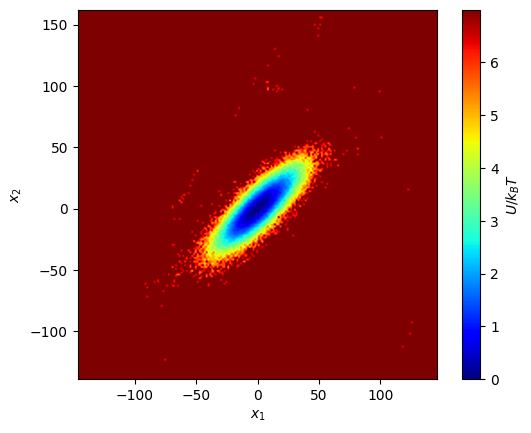

In [35]:
mm = multi_dim_gle(trunc = 10, bins = 200, kT =2.494, free_energy = 'MV',physical = True,diagonal_mass = False,plot=True)

pos_arrays, fe_arrays = mm.compute_free_energy_landscape(xvaf)